# Data Collection and visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
import osmnx as ox
import geopandas as gpd

In [2]:
dtf = pd.read_csv('Data_saved/importants_data/clean_fuel_gare_markets.csv', sep=';')
dt = pd.read_csv('Data_saved/all_df_attractors_with_cluster.csv')
df_p = pd.read_csv('Data_saved/importants_data/Grand_casa/population_casablanca.csv')

In [3]:
graph = ox.load_graphml("street_casa (1).graphml")

In [24]:
dt = dt[['x', 'y', 'Infrastructure', 'Population',
       'surface', 'KMcluster10']]
dtf['KMcluster10'] = dt['KMcluster10']
dtf['complete_name'] = dt['Infrastructure']
dtf = dtf[['id','y', 'x', 'name', 'type',  'category', 'surface',
       'parking', 'KMcluster10', 'complete_name']]
df_density, df_density_renked = population_buffer(dtf, df_p, R=1)
df_att_density, df_att_density_renked = attractor_buffer(dtf, R=1)
dtf['Population_inf_1_Km'] = df_density['Population_inf_1_Km']
dtf['nombre_de_voisins'] = df_att_density['nombre_de_voisins']
dtf.head()

,id,y,x,name,type,category,surface,parking,KMcluster10,complete_name,Population_inf_1_Km,nombre_de_voisins
0,553212547,33.544667,-7.640401,Marjane Californie,node,Super Market,4500,1.0,7.0,Super Market Marjane Californie at -7.6404008 ...,45427.162598,1
1,1464579577,33.594538,-7.595292,Acima,node,Super Market,1500,1.0,4.0,"Super Market Acima at -7.595292 , 33.5945384",64912.042969,18
2,1848408214,33.574692,-7.708105,Marjane Market Ghandi Mall,node,Super Market,250,0.0,5.0,"Super Market Marjane at -7.7081046 , 33.5746919",8021.813477,0
3,1848525532,33.577157,-7.674181,Carrefour Market Anfa,node,Super Market,250,0.0,1.0,"Super Market Carrefour Market at -7.6741813 , ...",29355.087891,0
4,1867124354,33.587934,-7.639303,Supermarché Mamoun,node,Super Market,250,0.0,1.0,Super Market Supermarché Mamoun at -7.6393035 ...,19664.840088,11


In [25]:
dtf['index_voisins'] = df_att_density['index_des_voisins']

In [26]:
df_p.head(3)

,X,Y,Z,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstyp,name,display_na
0,-7.505417,33.637083,3432.981445,33.64091,33.493772,-7.457416,-7.746445,288155221,relation,4072985,33.594514,-7.620028,boundary,administrative,16,0.617325,city,Casablanca,"Casablanca, préfecture d'arrondissements de Ca..."
1,-7.497083,33.637083,4260.725098,33.64091,33.493772,-7.457416,-7.746445,288155221,relation,4072985,33.594514,-7.620028,boundary,administrative,16,0.617325,city,Casablanca,"Casablanca, préfecture d'arrondissements de Ca..."
2,-7.513750,33.628750,4463.676270,33.64091,33.493772,-7.457416,-7.746445,288155221,relation,4072985,33.594514,-7.620028,boundary,administrative,16,0.617325,city,Casablanca,"Casablanca, préfecture d'arrondissements de Ca..."


In [27]:
df_p.shape

(1201, 19)

In [28]:
d0 = dtf[dtf.KMcluster10 ==0].reset_index(drop=True)
d1 = dtf[dtf.KMcluster10 ==1].reset_index(drop=True)
d2 = dtf[dtf.KMcluster10 ==2].reset_index(drop=True)
d3 = dtf[dtf.KMcluster10 ==3].reset_index(drop=True)
d4 = dtf[dtf.KMcluster10 ==4].reset_index(drop=True)
d5 = dtf[dtf.KMcluster10 ==5].reset_index(drop=True)
d6 = dtf[dtf.KMcluster10 ==6].reset_index(drop=True)
d7 = dtf[dtf.KMcluster10 ==7].reset_index(drop=True)
d8 = dtf[dtf.KMcluster10 ==8].reset_index(drop=True)
d9 = dtf[dtf.KMcluster10 ==9].reset_index(drop=True)

In [123]:
dtf.to_csv('Data_saved/importants_data/Final_all_attractors.csv')
df_p.to_csv('Data_saved/importants_data/Final_population_density_casablanca.csv')

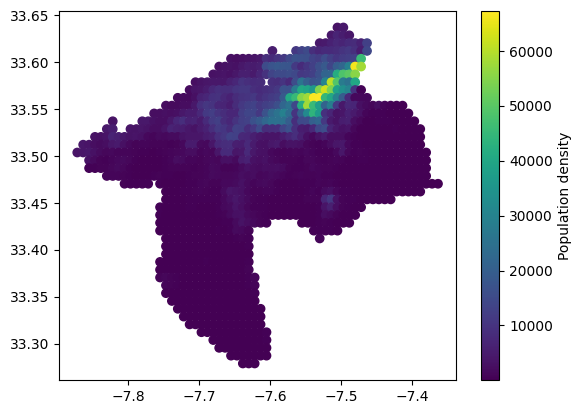

In [161]:
plt.scatter(df_p.X, df_p.Y, 
            c=df_p.Z, 
            cmap='viridis')
plt.colorbar(label='Population density')
plt.savefig('Data_saved/final_population_density.png')

In [74]:
shapefile_path = "Data_saved/importants_data/Grand_casa/Casa.shp"
gdf = gpd.read_file(shapefile_path)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\relational.py:459: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, _ = ax.get_legend_handles_labels()
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\relational.py:461: UserWarning: Legend does not support handles for Patch

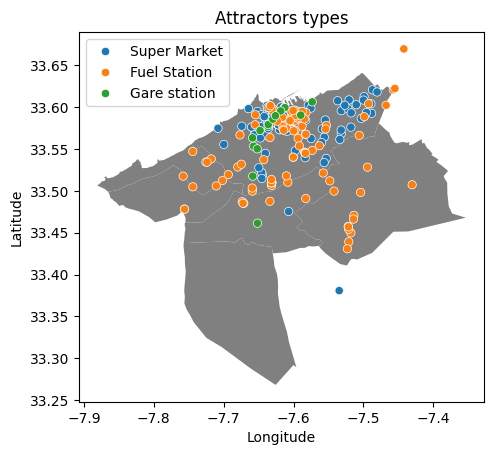

In [155]:
gdf.plot(label='grand Casablanca', color='grey')
sns.scatterplot(dtf, x='x', y='y', hue='category')
plt.title(f"Attractors types")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.savefig('Data_saved/final_attractors_types.png')

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\pc\AppData\Local\Temp\ipykernel_7240\1533356602.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


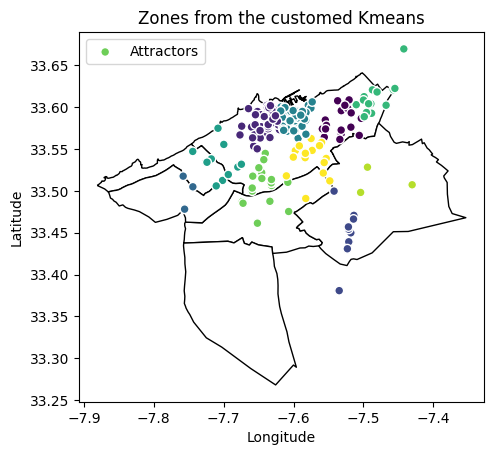

In [127]:
gdf.plot(label='grand Casablanca', color='white', edgecolors='k')
plt.scatter(dtf.x, dtf.y, 
            c=dtf['KMcluster10'],
            edgecolors='w',
            linewidth=1,
            s=40, label='Attractors'
           )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Zones from the customed Kmeans')
plt.savefig('Data_saved/final_clusters.png')

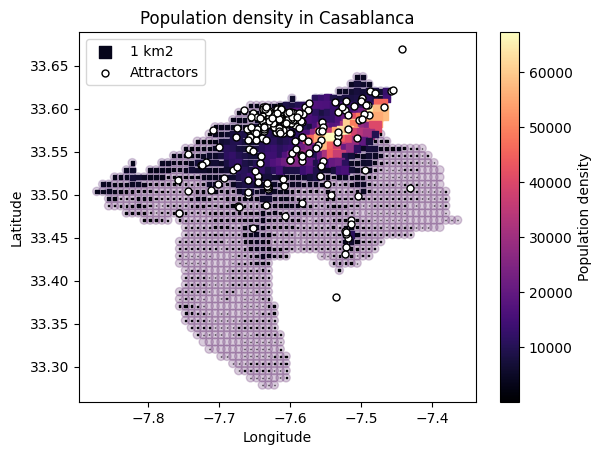

In [128]:
#gdf.plot(label='grand Casablanca', color='grey')
plt.scatter(df_p.X, df_p.Y, 
            alpha=0.2,
            c=df_p.Z, 
            #cmap='inferno'
           )
plt.scatter(df_p.X, df_p.Y, 
            c=df_p.Z, 
            cmap='magma',
            marker='s',
            s=df_p['Z']*size_scale,
            label='1 km2'
           )
plt.colorbar(label='Population density')
plt.scatter(dtf.x, dtf.y, label='Attractors', s=25, c='white', edgecolors='k')

plt.title(f"Population density in Casablanca")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.savefig('Data_saved/final_density_attractors.png')

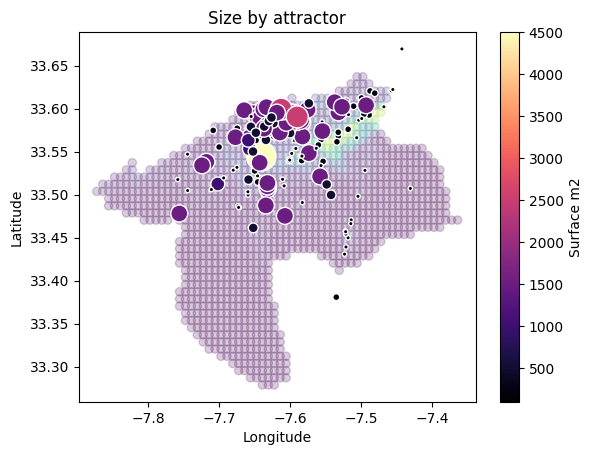

In [156]:
sc = 1/10
plt.scatter(df_p.X, df_p.Y, 
            alpha=0.2,
            c=df_p.Z, 
            #cmap='inferno'
           )
plt.scatter(dtf.x, dtf.y, 
            c=dtf['surface'], 
            s=dtf['surface']*sc, 
            #alpha=0.5, 
            edgecolors='w',
            linewidth=1,
            cmap='magma'
           )
plt.colorbar(label='Surface m2')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Size by attractor')
plt.savefig('Data_saved/final_surface.png')

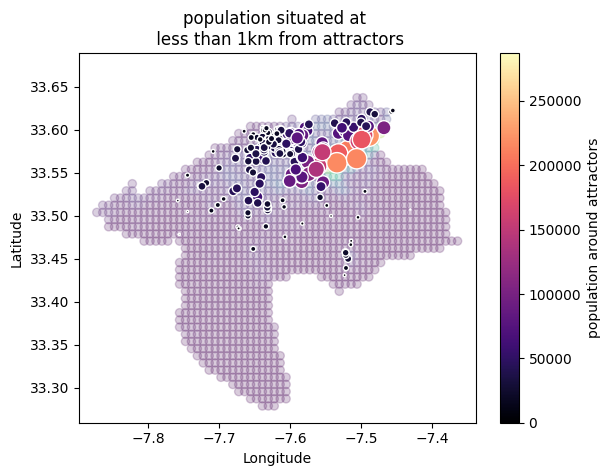

In [162]:
scc = 1/1000
plt.scatter(df_p.X, df_p.Y, 
            alpha=0.2,
            c=df_p.Z, 
            #cmap='inferno'
           )
plt.scatter(dtf.x, dtf.y, 
            c=dtf['Population_inf_1_Km'], 
            s=dtf['Population_inf_1_Km']*scc, 
            #alpha=0.5, 
            edgecolors='w',
            linewidth=1,
            cmap='magma'
           )
plt.colorbar(label='population around attractors')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('population situated at \n less than 1km from attractors')
plt.savefig('Data_saved/final_population_den.png')

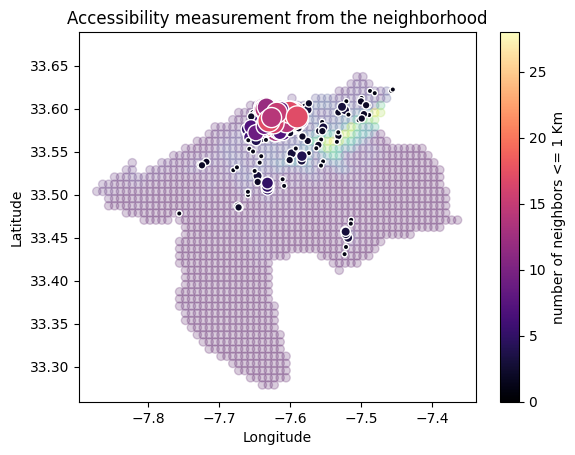

In [148]:
coef = 15
plt.scatter(df_p.X, df_p.Y, 
            alpha=0.2,
            c=df_p.Z, 
            #cmap='inferno'
           )
plt.scatter(dtf.x, dtf.y, 
            c=dtf['nombre_de_voisins'], 
            s=dtf['nombre_de_voisins']*coef, 
            #alpha=0.5, 
            edgecolors='w',
            linewidth=1,
            cmap='magma'
           )
plt.colorbar(label='number of neighbors <= 1 Km')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accessibility measurement from the neighborhood')
plt.savefig('Data_saved/final_voisin.png')

Text(0.5, 1.0, 'Total population choosing \n an attractor by the Huff Model')

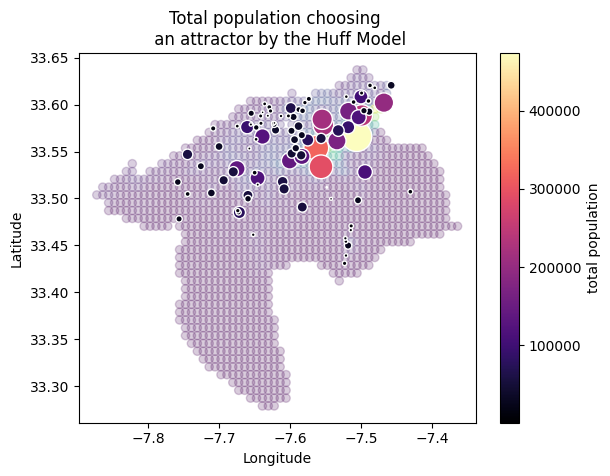

In [107]:
scc = 1/1000
plt.scatter(df_p.X, df_p.Y, 
            alpha=0.2,
            c=df_p.Z, 
            #cmap='inferno'
           )
plt.scatter(l.x, l.y, 
            c=l['Huff_population'], 
            s=l['Huff_population']*scc, 
            #alpha=0.5, 
            edgecolors='w',
            linewidth=1,
            cmap='magma'
           )
plt.colorbar(label='total population')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Total population choosing \n an attractor by the Huff Model')
#plt.savefig('Data_saved/real_pop_density.png')

# Functions 

In [30]:
def population_buffer(df1, df2, R=1):
    resultats = []

    for index1, row1 in df1.iterrows():
        coord_infrastructure = (row1['y'], row1['x'])
        infra = row1['category'] + ' ' + row1['name'] + ' at '+ str(row1['x'])+ ' , ' + str(row1['y'])
        population_totale = 0
        nombre_de_points = 0

        for index2, row2 in df2.iterrows():
            coord_zone = (row2['Y'], row2['X'])
            distance = geodesic(coord_infrastructure, coord_zone).km

            if distance <= R:
                population_totale += row2['Z']
                nombre_de_points += 1

        resultats.append({
            'x': row1['x'] ,
            'y' : row1['y'],
            'Infrastructure': infra,
            #'Nombre de points à distance R': nombre_de_points,
            f'Population_inf_{R}_Km': population_totale
        })

    resultats_df = pd.DataFrame(resultats)
    df_trie = resultats_df.sort_values(by=f'Population_inf_{R}_Km', ascending=False)
    return resultats_df, df_trie


In [31]:
def attractor_buffer(df, R=1):
    resultats = []
    for index1, row1 in df.iterrows():
        coord_start = (row1['y'], row1['x'])
        index_voisins = []
        nombre_de_voisins = 0

        for index2, row2 in df.iterrows():
            coord_end = (row2['y'], row2['x'])
            distance = geodesic(coord_start, coord_end).km
            if distance <= R and index1 != index2 :
                index_voisins.append(index2)
                nombre_de_voisins += 1

        resultats.append({
            'x': row1['x'] ,
            'y' : row1['y'],
            'nombre_de_voisins': nombre_de_voisins,
            'index_des_voisins' : index_voisins
        })

    resultats_df = pd.DataFrame(resultats)
    resultats_df = pd.concat([df, resultats_df[['nombre_de_voisins', 'index_des_voisins']]], axis=1)
    df_trie = resultats_df.sort_values(by='nombre_de_voisins', ascending=False)
    
    return resultats_df, df_trie


In [32]:
def matrix_D_ij(df_i, df_j):
    dx = 0.02
    dy = 0.02

    x_min = df_j['x'].min()
    x_max = df_j['x'].max()
    y_min = df_j['y'].min()
    y_max = df_j['y'].max()

    df1 = df_i[df_i.X >= x_min-dx]
    df1 = df1[df1.X <= x_max+dx]
    df2 = df1[df1.Y >= y_min-dy]
    new_df_i = df2[df2.Y <= y_max+dy]
    new_df_i = new_df_i.reset_index(drop=True)
    df_j = df_j.reset_index(drop=True)
    print('SHAPE of the new Df_population :',new_df_i.shape)
    D_ij = np.zeros((new_df_i.shape[0], df_j.shape[0]))
     
    for i in range(len(new_df_i)):
        coord_i = (new_df_i.loc[i].Y, new_df_i.loc[i].X)
        
        for j in range(len(df_j)):
            coord_j = (df_j.loc[j].y, df_j.loc[j].x)
            D_ij[i, j] = geodesic(coord_i, coord_j).km
    
    return D_ij, new_df_i

In [33]:
def matrix_D_ij2(df_i, df_j):
    D_ij = np.zeros((df_i.shape[0], df_j.shape[0]))
     
    for i in range(len(df_i)):
        coord_i = (df_i.loc[i].Y, df_i.loc[i].X)
        
        for j in range(len(df_j)):
            coord_j = (df_j.loc[j].y, df_j.loc[j].x)
            D_ij[i, j] = geodesic(coord_i, coord_j).km
    
    return D_ij

In [34]:
def matrix_H_ij(D_ij, df_j, alpha = 0.01304455, betha = 0.021322):
    H_ij = np.zeros(D_ij.shape)
    for i in range(D_ij.shape[0]):
        for j in range(D_ij.shape[1]):
            A_j = (df_j.loc[j].surface)*(df_j.loc[j].Population_inf_1_Km)*(df_j.loc[j].nombre_de_voisins)/1000000
            H_ij[i,j] = A_j**alpha/D_ij[i,j]**betha
            #H_ij[i,j] = 2000**alpha/D_ij[i,j]**betha

    return H_ij
    

In [35]:
def Attractiveness_A_j( df_j):
    A_j = np.zeros(len(df_j))
    dict = []
    for j in range(len(df_j)):
        A_j[j] = (df_j.loc[j].surface)*(df_j.loc[j].Population_inf_1_Km +1 )*(df_j.loc[j].nombre_de_voisins+1)/1000000
        dict.append(
            {
                'Attractiveness': A_j[j]
            }
        )
    df_attractiveness = pd.DataFrame(dict)
    df_concat = pd.concat([df_j, df_attractiveness], axis=1)
        

    return A_j, df_attractiveness, df_concat

In [36]:
dtf['attractiveness'] = (dtf.surface*(dtf.Population_inf_1_Km+1)*(dtf.nombre_de_voisins+1))/1000000
dtf.head()

,id,y,x,name,type,category,surface,parking,KMcluster10,complete_name,Population_inf_1_Km,nombre_de_voisins,index_voisins,attractiveness
0,553212547,33.544667,-7.640401,Marjane Californie,node,Super Market,4500,1.0,7.0,Super Market Marjane Californie at -7.6404008 ...,45427.162598,1,[152],408.853463
1,1464579577,33.594538,-7.595292,Acima,node,Super Market,1500,1.0,4.0,"Super Market Acima at -7.595292 , 33.5945384",64912.042969,18,"[34, 48, 63, 86, 89, 111, 112, 114, 123, 124, ...",1850.021725
2,1848408214,33.574692,-7.708105,Marjane Market Ghandi Mall,node,Super Market,250,0.0,5.0,"Super Market Marjane at -7.7081046 , 33.5746919",8021.813477,0,[],2.005703
3,1848525532,33.577157,-7.674181,Carrefour Market Anfa,node,Super Market,250,0.0,1.0,"Super Market Carrefour Market at -7.6741813 , ...",29355.087891,0,[],7.339022
4,1867124354,33.587934,-7.639303,Supermarché Mamoun,node,Super Market,250,0.0,1.0,Super Market Supermarché Mamoun at -7.6393035 ...,19664.840088,11,"[6, 10, 12, 21, 30, 40, 61, 102, 106, 134, 221]",58.997520


In [37]:
def matrix_P_ij(H_ij):
    P_ij = np.zeros(H_ij.shape)
    sum_j_Hij = np.sum(H_ij, axis=1).tolist()
    
    for i in range(H_ij.shape[0]):
        for j in range(H_ij.shape[1]):
            P_ij[i,j] = H_ij[i,j]/sum_j_Hij[i]

    return P_ij

In [38]:
def ranking_ij(P_ij):
    # Créer une matrice pour stocker les rangs
    rangs_matrice = np.zeros_like(P_ij, dtype=int)

    # Parcourir chaque colonne
    for i in range(P_ij.shape[0]):
        # Obtenir les indices triés pour la colonne j
        indices_tries = np.argsort(P_ij[i, :])

        # Assigner les rangs à la matrice de rangs
        rangs_matrice[i, indices_tries] = np.arange(1, P_ij.shape[1] + 1)

    return rangs_matrice
    

In [39]:
def find_position(ranking_ij, valeur=1):
    indices = np.where(ranking_ij == valeur)
    positions = list(zip(indices[0], indices[1]))
    
    return positions

In [40]:
def cluster_by_Huff_model(liste_tuples):  
    clusters = {}
    for a, b in liste_tuples:
        if b not in clusters:
            clusters[b] = [a]
        else:
            clusters[b].append(a)
            
    return clusters

In [41]:
def population_count(clustx, df_pop_x):
    top_pop = df_pop_x.Z.sum()
    pop_count = {}
    pop_count_per_100 = {}
    for pl in clustx.keys():
        pop_count[pl] = df_pop_x.loc[clustx[pl]].Z.sum()
        pop_count_per_100[pl] = df_pop_x.loc[clustx[pl]].Z.sum()/top_pop
    pop_count_trie = dict(sorted(pop_count.items(), key=lambda item: item[1], reverse=True))
    pop_count_trie_100 = dict(sorted(pop_count_per_100.items(), key=lambda item: item[1], reverse=True))
    
    return pop_count_trie, pop_count_trie_100


In [42]:
def resum_Huff_model(df_p, d1):
    
    D_ij_1, df_pop_1 = matrix_D_ij(df_p, d1)
    H_ij_1 = matrix_H_ij(D_ij_1, d1)
    P_ij_1 = matrix_P_ij(H_ij_1)
    Rank_ij_1 = ranking_ij(P_ij_1)
    first_PL = find_position(Rank_ij_1, valeur=1)
    clust1 = cluster_by_Huff_model(first_PL)
    a, b = population_count(clust1, df_pop_1)
    keys_a = list(a.keys())
    items_a = list(a.items())
    results = []
    for i in range(len(keys_a)):
        results.append(
        {'x' : d1.loc[keys_a[i]].x,
        'y' : d1.loc[keys_a[i]].y,
         'name': d1.loc[keys_a[i]]['name'],
        'Huff_population' : items_a[i][1]}
        )
    
    resultats_df = pd.DataFrame(results)
    df_trie = resultats_df.sort_values(by='Huff_population', ascending=False)
    return resultats_df, df_trie

In [43]:
from scipy.optimize import minimize

class Particle:
    def __init__(self, num_params):
        self.position = np.random.rand(num_params)  # Initial position
        self.velocity = np.random.rand(num_params)  # Initial velocity
        self.best_position = self.position.copy()   # Personal best position
        self.best_fitness = np.inf                 # Personal best fitness


def fitness_function(params, *args):
    # Extracting data
    attractivity, distances, choices_observed = args
    
    # Calculating predictions using Huff model for each client
    choices_predicted = np.array([huff_prediction(attractivity, distances, params[0], params[1]) for _ in range(choices_observed.shape[0])])
    
    # Calculating SSE for all clients
    sse = np.sum((choices_observed - choices_predicted) ** 2)
    
    return sse

def huff_prediction(attractivity, distances, gamma, beta):
    #print('attractivity',attractivity.shape)
    #print('distance', distances.shape)
    numerator = attractivity ** gamma * distances ** -beta
    denominator = np.sum(attractivity ** gamma * distances ** -beta, axis=1, keepdims=True)
    return numerator / denominator


def pso_huff(attractivity, distances, choices_observed, num_particles, num_iterations):
    num_params = 2  # Number of parameters (gamma, beta)
    particles = [Particle(num_params) for _ in range(num_particles)]
    global_best_position = np.random.rand(num_params)  # Initial global best position
    global_best_fitness = np.inf                     # Initial global best fitness
    
    for h in range(num_iterations):
        for particle in particles:
            fitness = fitness_function(particle.position, attractivity, distances, choices_observed)
            if fitness < particle.best_fitness:
                particle.best_fitness = fitness
                particle.best_position = particle.position.copy()
            
            if fitness < global_best_fitness:
                global_best_fitness = fitness
                global_best_position = particle.position.copy()
                
        for particle in particles:
            # Update velocity
            particle.velocity = 0.5 * particle.velocity + 1 * (particle.best_position - particle.position) + 1 * (global_best_position - particle.position)
            # Update position
            particle.position = particle.position + particle.velocity
        print('iteration', h+1,'/',num_iterations, 'terminée')
            
    return global_best_position

In [44]:
def generate_observed_data(df_p, dtf, distance=1.2, sample=150):

    list_place = []
    dx = 0.03
    dy = 0.03
    x_min = dtf['x'].min()
    x_max = dtf['x'].max()
    y_min = dtf['y'].min()
    y_max = dtf['y'].max()

    df1 = df_p[df_p.X >= x_min-dx]
    df1 = df1[df1.X <= x_max+dx]
    df2 = df1[df1.Y >= y_min-dy]
    new_df = df2[df2.Y <= y_max+dy].reset_index(drop=True)
    real_pop = new_df.sample(sample)
    #real_pop = real_pop[real_pop.name]
    print(new_df.shape)
    #real_pop = new_df.sample(sample).reset_index(drop=True)
    
    for i in real_pop.index:
        coord_i = (real_pop.loc[i].Y, real_pop.loc[i].X)
        list_att = []
        list_inv = []
        dist_dict = {}
        dist_dict2 = {}
        for j in range(len(dtf)):
            coord_j = (dtf.loc[j].y, dtf.loc[j].x)
            dist = geodesic(coord_i, coord_j).km
            if dist <= distance :
                list_att.append(dtf.loc[j].name)
                dist_dict[j] = dist
            else :
                list_inv.append(dtf.loc[j].name)
                dist_dict2[j] = dist
        
        try:
            chosen_j = min(dist_dict, key=dist_dict.get)
            dist_ij = dist_dict[chosen_j]
        except:
            chosen_j = min(dist_dict2, key=dist_dict2.get)
            dist_ij = dist_dict2[chosen_j]
        
        list_place.append(
            {
                'X': real_pop.loc[i].X,
                'Y': real_pop.loc[i].Y,
                'real_i': real_pop.loc[i].name,
                'real_j': chosen_j,
                'dist_ij': dist_ij,
                'name': dtf.loc[chosen_j]['name'],
                'x':dtf.loc[chosen_j].x,
                'y': dtf.loc[chosen_j].y,
                'attractiveness':dtf.loc[chosen_j]['attractiveness']
            }
        )
    df_real = pd.DataFrame(list_place)
    
    return df_real, new_df

In [128]:
def df_to_matrix(df, matrix):
    # Créer une copie de la matrice pour ne pas modifier l'originale
    modified_matrix = np.zeros(matrix.shape)
    
    # Parcourir chaque ligne du DataFrame
    for index, row in df.iterrows():
        # Extraire les indices i et j de la ligne du DataFrame
        i, j = row['real_i'], row['real_j']
        #print(index, i)
        # Remplacer les valeurs de la matrice à la position (i, j) par 1
        # et les autres valeurs par 0
        modified_matrix[i, j] = 1
        #modified_matrix[np.arange(len(matrix)) != i, j] = 0
    
    return modified_matrix

In [129]:
def choices_predicted_Huff(matrix):
    # Copie de la matrice pour ne pas modifier l'originale
    binary_matrix = matrix.copy()
    # Parcourir chaque ligne de la matrice
    for row in range(matrix.shape[0]):
        # Trouver l'indice de la valeur maximale dans la ligne
        #print(matrix[row])
        try:
            max_index = np.argmax(matrix[row])
        except:
            max_index = 0
        # Remplacer toutes les valeurs par zéro sauf la valeur maximale par un
        binary_matrix[row] = np.where(np.arange(matrix.shape[1]) == max_index, 1, 0)
    return binary_matrix


In [47]:
def matrice_attractivite(dtf_gare, df_pop_gare):
    attractivity_gare, _, _ = Attractiveness_A_j(dtf_gare)
    nb_clients = len(df_pop_gare)
    attractivite_gare = np.zeros((nb_clients, len(attractivity_gare)))
    for i in range(attractivite_gare.shape[0]) :
        for j in range(attractivite_gare.shape[1]) :
            #print(attractivity[j])
            attractivite_gare[i,j] = attractivity_gare[j]
    return attractivite_gare

In [106]:
def from_binary_to_df(choices_x, df_p, dtf_type):
    data = []
    for i in range(len(df_p)):
        for j in range(len(dtf_type)):
            
            #print(i,j)
            if choices_x[i,j]==1 :
                data.append(
                    {
                        'X': df_p.loc[i].X,
                        'Y': df_p.loc[i].Y,
                        'name': dtf_type.loc[j]['name'],
                        'complete_name':dtf_type.loc[j].complete_name,
                        'x': dtf_type.loc[j].x,
                        'y': dtf_type.loc[j].y,
                        
                    }
                )
    df = pd.DataFrame(data)
    return df

In [49]:
def population_from_zone_x(df_pop, dtf_zone, dx=0.025, dy=0.025):
    x_min = dtf_zone['x'].min()
    x_max = dtf_zone['x'].max()
    y_min = dtf_zone['y'].min()
    y_max = dtf_zone['y'].max()

    df1 = df_pop[df_pop.X >= x_min-dx]
    df1 = df1[df1.X <= x_max+dx]
    df2 = df1[df1.Y >= y_min-dy]
    new_df = df2[df2.Y <= y_max+dy].reset_index(drop=True)
    return new_df

# Tests and Implmentations 

## Zone 0

### gares

In [ ]:
d1_gare = d1[d1.category=='Gare station'].reset_index(drop=True)

D_ij_0 = matrix_D_ij2(df_p, d1_gare)
H_ij_0 = matrix_H_ij(D_ij_0, d1_gare, alpha=0.04100043, betha=1.21489747) 
P_ij_0 = matrix_P_ij(H_ij_0)
choices_0 = choices_predicted_Huff(P_ij_0)
df_choices_gare = from_binary_to_df(choices_0, df_p, d1_gare)

In [ ]:
df_choices_gare = from_binary_to_df(choices_0, df_p, d1_gare)

In [88]:
dff = d1.copy()
dff.loc[dff['complete_name']=='Gare station my Station at -7.6258831 , 33.5896049', 'name'] = 'Casa Port'
dff.loc[dff['name']=='Casa Port', 'surface'] = 6700
dff[dff['name']=='Casa Port']

,id,y,x,name,type,category,surface,parking,KMcluster10,complete_name,Population_inf_1_Km,nombre_de_voisins,index_voisins
63,6205371672,33.589605,-7.625883,Casa Port,node,Gare station,6700,NaN,1.0,"Gare station my Station at -7.6258831 , 33.589...",20659.499512,14,"[25, 26, 27, 30, 40, 82, 100, 106, 115, 116, 1..."


In [60]:
df_choices_gare.complete_name.unique()

array(['Gare station my Station at -7.6258831 , 33.5896049',
       'Gare station my Station at -7.6295962 , 33.5855888',
       'Gare station my Station at -7.6479067 , 33.5719544',
       'Gare station my Station at -7.6361947 , 33.579126',
       'Gare station Anfa Centre at -7.6586212 , 33.5632426',
       'Gare station Casablanca-Maârif at -7.6364792 , 33.5767396',
       'Gare station Anfa Sud at -7.6571082 , 33.5532527',
       'Gare station my Station at -7.6519513 , 33.5501636'], dtype=object)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\pc\AppData\Local\Temp\ipykernel_13400\1009483097.py:46: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


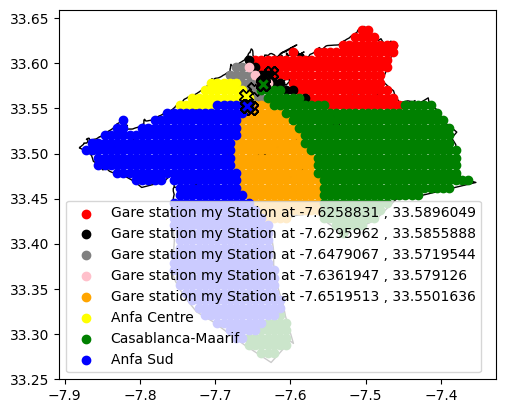

In [78]:
#sns.scatterplot(data=df_choices_gare,x=df_choices_gare.X, y=df_choices_gare.Y, hue='name', marker='s', s=80)
#sns.scatterplot(data=df_choices_gare,x=df_choices_gare.x, y=df_choices_gare.y, marker='X', s=80)
colors = {'Gare station my Station at -7.6258831 , 33.5896049': 'red',
          'Gare station my Station at -7.6295962 , 33.5855888':'k',
          'Gare station my Station at -7.6479067 , 33.5719544':'grey',
          'Gare station my Station at -7.6361947 , 33.579126':'pink',
          'Gare station my Station at -7.6519513 , 33.5501636':'orange',
          'Anfa Centre': 'yellow', 
          'Casablanca-Maarif': 'green', 
          'Anfa Sud':'blue'
          
         }
gdf.plot(label='grand Casablanca', color='white', edgecolors='k')
# Créer le scatter plot
#plt.figure(figsize=(8, 6))
for category, color in colors.items():
    plt.scatter(df_choices_gare[df_choices_gare['complete_name'] == category]['X'], 
                df_choices_gare[df_choices_gare['complete_name'] == category]['Y'], 
                color=color, 
                #label=category,
                #marker='s',
                #s=80
               )
    plt.scatter(df_choices_gare[df_choices_gare['complete_name'] == category]['x'], 
                df_choices_gare[df_choices_gare['complete_name'] == category]['y'], 
                color=color, 
                #label=category,
                marker='X',edgecolors='k',
                s=80
               )
    plt.scatter(df_choices_gare[df_choices_gare['name'] == category]['X'], 
                df_choices_gare[df_choices_gare['name'] == category]['Y'], 
                color=color, 
                label=category,
                #marker='s',
                #s=80
               )
    plt.scatter(df_choices_gare[df_choices_gare['name'] == category]['x'], 
                df_choices_gare[df_choices_gare['name'] == category]['y'], 
                color=color, 
                #label=category,
                marker='X',edgecolors='k',
                s=80
               )

#plt.legend()
plt.savefig('Data_saved/real_pop_density.png')

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\relational.py:459: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, _ = ax.get_legend_handles_labels()
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\relational.py:461: UserWarning: Legend does not support handles for Patch

<Axes: xlabel='X', ylabel='Y'>

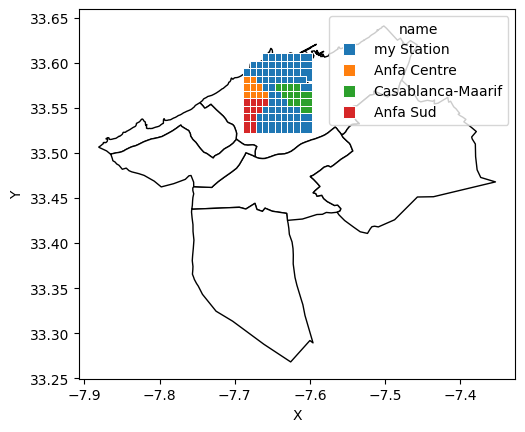

In [260]:
zone1_choices = population_from_zone_x(df_choices_gare, df_choices_gare, dx=0.025, dy=0.025)
gdf.plot(label='grand Casablanca', color='white', edgecolors='k')
sns.scatterplot(data=zone1_choices,x=zone1_choices.X, y=zone1_choices.Y, hue='name', marker='s', s=80)
#sns.scatterplot(data=df_choices_gare,x=df_choices_gare.x, y=df_choices_gare.y, marker='X', s=80)

In [ ]:
keys0 = list(clust0.keys())
n0 = len(clust0.keys())
n0_couleurs = plt.cm.get_cmap(f'tab{n0}', n0)

# Générer 10 couleurs différentes
n0_couleurs = [n0_couleurs(i) for i in range(n0)]

plt.scatter(d0.x, d0.y)
for i in range(n0):
    plt.scatter(d0.loc[keys0[i]].x, d0.loc[keys0[i]].y, marker='X', s=100, c=n0_couleurs[i])
    plt.scatter(df_pop_0.loc[clust0[keys0[i]]].X, df_pop_0.loc[clust0[keys0[i]]].Y, marker='s', c=n0_couleurs[i])

### fuel station

In [ ]:
D_ij_0, df_pop_0 = matrix_D_ij(df_p, d0)
H_ij_0 = matrix_H_ij(D_ij_0, d0, alpha = 0.01304455, betha = 0.021322)
P_ij_0 = matrix_P_ij(H_ij_0)
choices_0 = choices_predicted_Huff(P_ij_0)
Rank_ij_0 = ranking_ij(P_ij_0)
first_PL_0 = find_position(Rank_ij_0, valeur=1)
clust0 = cluster_by_Huff_model(first_PL_0)
clust0

In [ ]:
d1_fuel = d1[d1.category=='Fuel Station'].reset_index(drop=True)

D_ij_0 = matrix_D_ij2(df_p, d1_fuel)
print(D_ij_0)
H_ij_0 = matrix_H_ij(D_ij_0, d1_fuel, alpha=-0.03874734, betha=0.77139877) 
print(H_ij_0)
P_ij_0 = matrix_P_ij(H_ij_0)
print(P_ij_0)
choices_0 = choices_predicted_Huff(P_ij_0)
df_choices_gare = from_binary_to_df(choices_0, df_p, d1_fuel)

In [121]:
def matrix_choices_resume(d1, categ='Fuel Station', alpha=-0.03874734, betha=0.77139877):
    d1_fuel = d1[d1.category==categ].reset_index(drop=True)

    D_ij_0 = matrix_D_ij2(df_p, d1_fuel)
    H_ij_0 = matrix_H_ij(D_ij_0, d1_fuel, alpha, betha) 
    P_ij_0 = matrix_P_ij(H_ij_0)
    
    choices_0 = choices_predicted_Huff(P_ij_0)
    df_choices_gare = from_binary_to_df(choices_0, df_p, d1_fuel)

    return df_choices_gare

In [ ]:
ttt0 = matrix_choices_resume(d0, categ='Fuel Station', alpha=-0.03874734, betha=0.77139877)
ttt1 = matrix_choices_resume(d1, categ='Fuel Station', alpha=-0.03874734, betha=0.77139877)
ttt2 = matrix_choices_resume(d2, categ='Fuel Station', alpha=-0.03874734, betha=0.77139877)
ttt3 = matrix_choices_resume(d3, categ='Fuel Station', alpha=-0.03874734, betha=0.77139877)
ttt4 = matrix_choices_resume(d4, categ='Fuel Station', alpha=-0.03874734, betha=0.77139877)
ttt5 = matrix_choices_resume(d5, categ='Fuel Station', alpha=-0.03874734, betha=0.77139877)
ttt6 = matrix_choices_resume(d6, categ='Fuel Station', alpha=-0.03874734, betha=0.77139877)
ttt7 = matrix_choices_resume(d7, categ='Fuel Station', alpha=-0.03874734, betha=0.77139877)
ttt8 = matrix_choices_resume(d8, categ='Fuel Station', alpha=-0.03874734, betha=0.77139877)
ttt9 = matrix_choices_resume(d9, categ='Fuel Station', alpha=-0.03874734, betha=0.77139877)

In [137]:
tt0 = matrix_choices_resume(d0, categ='Super Market', alpha=-0.10346933, betha=0.93958604)
tt1 = matrix_choices_resume(d1, categ='Super Market', alpha=-0.10346933, betha=0.93958604)
tt2 = matrix_choices_resume(d2, categ='Super Market', alpha=-0.10346933, betha=0.93958604)
#tt3 = matrix_choices_resume(d3, categ='Super Market', alpha=-0.10346933, betha=0.93958604)
tt4 = matrix_choices_resume(d4, categ='Super Market', alpha=-0.10346933, betha=0.93958604)
tt5 = matrix_choices_resume(d5, categ='Super Market', alpha=-0.10346933, betha=0.93958604)
tt6 = matrix_choices_resume(d6, categ='Super Market', alpha=-0.10346933, betha=0.93958604)
tt7 = matrix_choices_resume(d7, categ='Super Market', alpha=-0.10346933, betha=0.93958604)
tt8 = matrix_choices_resume(d8, categ='Super Market', alpha=-0.10346933, betha=0.939586047)
tt9 = matrix_choices_resume(d9, categ='Super Market', alpha=-0.10346933, betha=0.93958604)

C:\Users\pc\AppData\Local\Temp\ipykernel_13400\4124418115.py:6: RuntimeWarning: divide by zero encountered in scalar power
  H_ij[i,j] = A_j**alpha/D_ij[i,j]**betha
C:\Users\pc\AppData\Local\Temp\ipykernel_13400\4077552802.py:7: RuntimeWarning: invalid value encountered in scalar divide
  P_ij[i,j] = H_ij[i,j]/sum_j_Hij[i]
C:\Users\pc\AppData\Local\Temp\ipykernel_13400\4124418115.py:6: RuntimeWarning: divide by zero encountered in scalar power
  H_ij[i,j] = A_j**alpha/D_ij[i,j]**betha
C:\Users\pc\AppData\Local\Temp\ipykernel_13400\4077552802.py:7: RuntimeWarning: invalid value encountered in scalar divide
  P_ij[i,j] = H_ij[i,j]/sum_j_Hij[i]


In [140]:
tt3

""


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\relational.py:459: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, _ = ax.get_legend_handles_labels()
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\relational.py:461: UserWarning: Legend does not support handles for Patch

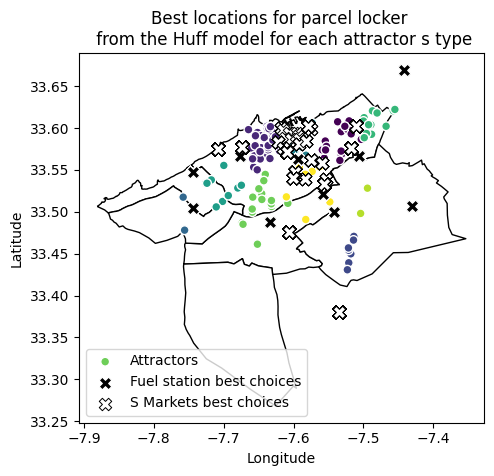

In [147]:
gdf.plot(label='grand Casablanca', color='white', edgecolors='k')

plt.scatter(dtf.x, dtf.y, 
            c=dtf['KMcluster10'],
            edgecolors='w',
            linewidth=1,
            s=40, label='Attractors'
           )


ss= 80
cc1 = 'k'
cc2 = 'w'
sns.scatterplot(ttt0,x=ttt0.x, y=ttt0.y, marker='X', s=ss, label='Fuel station best choices', color=cc1)
sns.scatterplot(ttt1,x=ttt1.x, y=ttt1.y, marker='X', s=ss, color=cc1)
sns.scatterplot(ttt2,x=ttt2.x, y=ttt2.y, marker='X', s=ss, color=cc1)
sns.scatterplot(ttt3,x=ttt3.x, y=ttt3.y, marker='X', s=ss, color=cc1)
sns.scatterplot(ttt4,x=ttt4.x, y=ttt4.y, marker='X', s=ss, color=cc1)
sns.scatterplot(ttt5,x=ttt5.x, y=ttt5.y, marker='X', s=ss, color=cc1)
sns.scatterplot(ttt6,x=ttt6.x, y=ttt6.y, marker='X', s=ss, color=cc1)
sns.scatterplot(ttt7,x=ttt7.x, y=ttt7.y, marker='X', s=ss, color=cc1)
sns.scatterplot(ttt8,x=ttt8.x, y=ttt8.y, marker='X', s=ss, color=cc1)
sns.scatterplot(ttt9,x=ttt9.x, y=ttt9.y, marker='X', s=ss, color=cc1)

sns.scatterplot(tt0,x=tt0.x, y=tt0.y, marker='X', s=ss, label='S Markets best choices', color=cc2, edgecolors=cc1)
sns.scatterplot(tt1,x=tt1.x, y=tt1.y, marker='X', s=ss, color=cc2, edgecolors=cc1)
sns.scatterplot(tt2,x=tt2.x, y=tt2.y, marker='X', s=ss, color=cc2, edgecolors=cc1)
#sns.scatterplot(tt3,x=tt3.x, y=tt3.y, marker='X', s=ss, color=cc2, edgecolors=cc1)
sns.scatterplot(tt4,x=tt4.x, y=tt4.y, marker='X', s=ss, color=cc2, edgecolors=cc1)
sns.scatterplot(tt5,x=tt5.x, y=tt5.y, marker='X', s=ss, color=cc2, edgecolors=cc1)
sns.scatterplot(tt6,x=tt6.x, y=tt6.y, marker='X', s=ss, color=cc2, edgecolors=cc1)
sns.scatterplot(tt7,x=tt7.x, y=tt7.y, marker='X', s=ss, color=cc2, edgecolors=cc1)
#sns.scatterplot(tt8,x=tt8.x, y=tt8.y, marker='X', s=ss, color=cc2, edgecolors=cc1)
sns.scatterplot(tt9,x=tt9.x, y=tt9.y, marker='X', s=ss, color=cc2, edgecolors=cc1)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Best locations for parcel locker \n from the Huff model for each attractor s type')
plt.savefig('Data_saved/final_Huff_choices.png')

In [118]:
df_choices_fuel = from_binary_to_df(choices_0, df_p, d1_fuel)

In [100]:
df_choices_gare.complete_name.unique()
dtf_fuel['surface'] = dtf_fuel['surface'].replace(1500, 700)
dtf_fuel[dtf_fuel.complete_name==df_choices_gare.loc[1].complete_name]

,id,y,x,name,type,category,surface,parking,KMcluster10,complete_name,Population_inf_1_Km,nombre_de_voisins,index_voisins,attractiveness
8,2146499640,33.521236,-7.557457,Afriquia,node,Fuel Station,700,NaN,9.0,"Fuel Station Afriquia at -7.5574575 , 33.5212361",23165.723633,0,[],34.750085


<Axes: xlabel='X', ylabel='Y'>

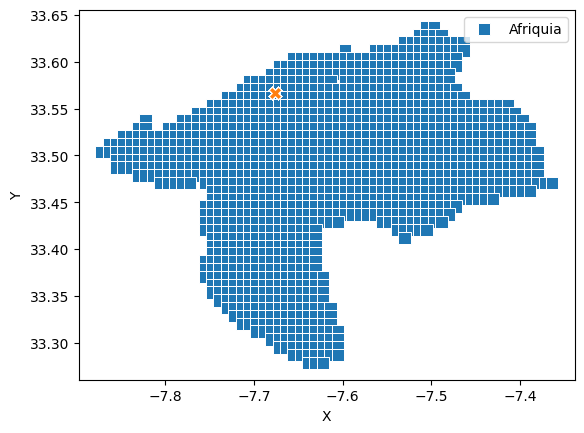

In [119]:
sns.scatterplot(data=df_choices_fuel,x=df_choices_fuel.X, y=df_choices_fuel.Y, hue='name', marker='s', s=80)
sns.scatterplot(data=df_choices_fuel,x=df_choices_fuel.x, y=df_choices_fuel.y, marker='X', s=80)

In [ ]:
zone1_choices = population_from_zone_x(df_choices_gare, df_choices_gare, dx=0.025, dy=0.025)
gdf.plot(label='grand Casablanca', color='white', edgecolors='k')
sns.scatterplot(data=zone1_choices,x=zone1_choices.X, y=zone1_choices.Y, hue='name', marker='s', s=80)
#sns.scatterplot(data=df_choices_gare,x=df_choices_gare.x, y=df_choices_gare.y, marker='X', s=80)

### super markets

In [ ]:
D_ij_0, df_pop_0 = matrix_D_ij(df_p, d0)
H_ij_0 = matrix_H_ij(D_ij_0, d0, alpha = 0.01304455, betha = 0.021322)
P_ij_0 = matrix_P_ij(H_ij_0)
choices_0 = choices_predicted_Huff(P_ij_0)
Rank_ij_0 = ranking_ij(P_ij_0)
first_PL_0 = find_position(Rank_ij_0, valeur=1)
clust0 = cluster_by_Huff_model(first_PL_0)
clust0

## Zone 1

In [295]:
D_ij_1, df_pop_1 = matrix_D_ij(df_p, d1)
H_ij_1 = matrix_H_ij(D_ij_1, d1)
P_ij_1 = matrix_P_ij(H_ij_1)
Rank_ij_1 = ranking_ij(P_ij_1)
first_PL = find_position(Rank_ij_1, valeur=1)
clust1 = cluster_by_Huff_model(first_PL)
clust1

SHAPE of the new Df_population : (91, 19)


{0: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90]}

C:\Users\pc\AppData\Local\Temp\ipykernel_7240\1515317747.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  n1_couleurs = plt.cm.get_cmap(f'tab{n0}', n1)
C:\Users\pc\AppData\Local\Temp\ipykernel_7240\1515317747.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d1.loc[keys1[i]].x, d1.loc[keys1[i]].y, marker='X', s=100, c=n1_couleurs[i])
C:\Users\pc\AppData\Local\Temp\ipykernel_7240\1515317747.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will h

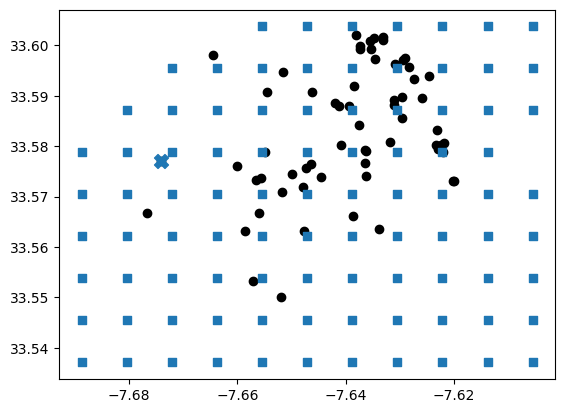

In [297]:
keys1 = list(clust1.keys())
n1 = len(clust1.keys())
n1_couleurs = plt.cm.get_cmap(f'tab{n0}', n1)

# Générer 10 couleurs différentes
n1_couleurs = [n1_couleurs(i) for i in range(n1)]

plt.scatter(d1.x, d1.y, c='k')
for i in range(n1):
    plt.scatter(d1.loc[keys1[i]].x, d1.loc[keys1[i]].y, marker='X', s=100, c=n1_couleurs[i])
    plt.scatter(df_pop_1.loc[clust1[keys1[i]]].X, df_pop_1.loc[clust1[keys1[i]]].Y, marker='s', c=n1_couleurs[i])

In [299]:
a, b = population_count(clust1, df_pop_1)
a

{0: 756162.466796875}

In [313]:
d1.loc[0]

id                                                            1848525532
y                                                              33.577157
x                                                              -7.674181
name                                               Carrefour Market Anfa
type                                                                node
category                                                    Super Market
surface                                                              250
parking                                                              0.0
KMcluster10                                                          1.0
complete_name          Super Market Carrefour Market at -7.6741813 , ...
Population_inf_1_Km                                         29355.087891
nombre_de_voisins                                                      0
index_voisins                                                         []
Name: 0, dtype: object

## Zone 3

In [312]:
D_ij_2, df_pop_2 = matrix_D_ij(df_p, d2)
H_ij_2 = matrix_H_ij(D_ij_2, d2)
P_ij_2 = matrix_P_ij(H_ij_2)
Rank_ij_2 = ranking_ij(P_ij_2)
first_PL2 = find_position(Rank_ij_1, valeur=1)
clust2 = cluster_by_Huff_model(first_PL2)
pop_by_attract, pop_bA_trie = population_count(clust2, df_pop_2)
pop_by_attract

SHAPE of the new Df_population : (94, 19)


{0: 102961.22277069089}

In [302]:
d2.loc[0]

id                                                      4129023489
y                                                        33.380807
x                                                        -7.534623
name                                                           BIM
type                                                          node
category                                              Super Market
surface                                                        250
parking                                                        NaN
KMcluster10                                                    2.0
complete_name          Super Market BIM at -7.5346227 , 33.3808071
Population_inf_1_Km                                            0.0
nombre_de_voisins                                                0
index_voisins                                                   []
Name: 0, dtype: object

In [ ]:
plt.scatter(d1.x, d1.y, label='Attractors')
plt.scatter(d1.loc[0].x, d1.loc[0].y, marker='X', c='red', s=80, label=d1.loc[0]['name'] )
plt.scatter(a2.loc[46].x, a2.loc[46].y, marker='X', c='orange', s=80, label=a2.loc[46]['name'] )
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.scatter(df_pop_1.loc[clust1[27]].X, df_pop_1.loc[clust1[27]].Y, c='green')

In [314]:
p, l = resum_Huff_model(df_p, d0)

SHAPE of the new Df_population : (104, 19)


In [315]:
p.head()

,x,y,name,Huff_population
0,-7.505926,33.566176,my Fuel Station,2.431737e+06


In [316]:
l.head()

,x,y,name,Huff_population
0,-7.505926,33.566176,my Fuel Station,2.431737e+06


In [141]:
df1 , df_t1 = resum_Huff_model(df_p, d1)
df2 , df_t2 = resum_Huff_model(df_p, d2)
df3 , df_t3 = resum_Huff_model(df_p, d3)
df4 , df_t4 = resum_Huff_model(df_p, d4)
df5 , df_t5 = resum_Huff_model(df_p, d5)
df6 , df_t6 = resum_Huff_model(df_p, d6)
df7 , df_t7 = resum_Huff_model(df_p, d7)
df8 , df_t8 = resum_Huff_model(df_p, d8)
df9 , df_t9 = resum_Huff_model(df_p, d9)

SHAPE of the new Df_population : (91, 19)
SHAPE of the new Df_population : (94, 19)
SHAPE of the new Df_population : (56, 19)
SHAPE of the new Df_population : (90, 19)
SHAPE of the new Df_population : (153, 19)
SHAPE of the new Df_population : (55, 19)
SHAPE of the new Df_population : (195, 19)
SHAPE of the new Df_population : (126, 19)
SHAPE of the new Df_population : (155, 19)


# PSO (Particle Swarm Optimisation)

In [91]:
df_p.shape

(1201, 19)

In [90]:
dtf_gare = dtf[dtf.category=='Gare station' ].reset_index(drop=True)
dtf_fuel = dtf[dtf.category=='Fuel Station' ].reset_index(drop=True)
dtf_smarket = dtf[dtf.category=='Super Market'].reset_index(drop=True)

# 

In [173]:
D_ij_gare, df_pop_gare = matrix_D_ij(df_p, dtf_gare)
H_ij_gare = matrix_H_ij(D_ij_gare, dtf_gare)
P_ij_gare = matrix_P_ij(H_ij_gare)

SHAPE of the new Df_population : (300, 19)


In [174]:
D_ij_fuel, df_pop_fuel = matrix_D_ij(df_p, dtf_fuel)
H_ij_fuel = matrix_H_ij(D_ij_fuel, dtf_fuel)
P_ij_fuel = matrix_P_ij(H_ij_fuel)

SHAPE of the new Df_population : (885, 19)


In [175]:
D_ij_smarket, df_pop_smarket = matrix_D_ij(df_p, dtf_smarket)
H_ij_smarket = matrix_H_ij(D_ij_smarket, dtf_smarket)
P_ij_smarket = matrix_P_ij(H_ij_smarket)

SHAPE of the new Df_population : (845, 19)


In [176]:
observed_df_gare, all_pop_gare = generate_observed_data(df_pop_gare, dtf_gare, distance=1, sample=100)
#observed_df_gare = observed_df_gare[observed_df_gare.index<=observed_df_gare.real_i.max()]
observed_df_fuel, all_pop_fuel = generate_observed_data(df_pop_fuel, dtf_fuel, distance=1, sample=100)
#observed_df_fuel = observed_df_fuel[observed_df_fuel.index<=max(observed_df_fuel.real_i)]
observed_df_smarket, all_pop_smarket = generate_observed_data(df_pop_smarket, dtf_smarket, distance=1, sample=100)
#observed_df_smarket = observed_df_smarket[observed_df_smarket.index<=observed_df_smarket.real_i.max()]

(300, 19)
(885, 19)
(845, 19)


In [177]:
#observed_df_gare[observed_df_gare.real_i==]
a = observed_df_gare[['real_i', 'real_j']]
b = observed_df_fuel[['real_i', 'real_j']]
c = observed_df_smarket[['real_i', 'real_j']]

In [ ]:
choices_observed_gare = df_to_matrix(a, P_ij_gare)
choices_observed_fuel = df_to_matrix(b, P_ij_fuel)
choices_observed_smarket = df_to_matrix(c, P_ij_smarket)

In [179]:
choices_observed_gare

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [183]:
attractivity_gare, _, _ = Attractiveness_A_j(dtf_gare)
nb_clients = len(df_pop_gare)
attractivite_gare = np.zeros((nb_clients, len(attractivity_gare)))
for i in range(attractivite_gare.shape[0]) :
    for j in range(attractivite_gare.shape[1]) :
        #print(attractivity[j])
        attractivite_gare[i,j] = attractivity_gare[j]

attractivite_gare.shape

(300, 14)

In [ ]:
attract = attractivite_gare
dist = D_ij_gare
choices_observed = choices_observed_gare

# PSO parameters
num_particles = 10
num_iterations = 100

best_params = pso_huff(attract, dist, choices_observed, num_particles, num_iterations)

print("Best parameters (gamma, beta):", best_params, 'PARAMS :',num_particles, num_iterations)

In [217]:
-0.1066507   0.69970005 PARAMS : 5 20
[0.04246737 1.21503679] PARAMS : 5 25
[0.04096608 1.21500163] PARAMS : 5 30
[0.04100043 1.21489749] PARAMS : 5 60
[0.04100043 1.21489747] PARAMS : 10 100

In [196]:
attractivite_fuel = matrice_attractivite(dtf_fuel, df_pop_fuel)
# PSO parameters
num_particles = 10
num_iterations = 100

best_params = pso_huff(attractivite_fuel, D_ij_fuel, choices_observed_fuel, num_particles, num_iterations)

print("Best parameters (gamma, beta):", best_params, 'PARAMS :',num_particles, num_iterations)

iteration 1 / 100 terminée
iteration 2 / 100 terminée
iteration 3 / 100 terminée
iteration 4 / 100 terminée
iteration 5 / 100 terminée
iteration 6 / 100 terminée
iteration 7 / 100 terminée
iteration 8 / 100 terminée
iteration 9 / 100 terminée
iteration 10 / 100 terminée
iteration 11 / 100 terminée
iteration 12 / 100 terminée
iteration 13 / 100 terminée
iteration 14 / 100 terminée
iteration 15 / 100 terminée
iteration 16 / 100 terminée
iteration 17 / 100 terminée
iteration 18 / 100 terminée
iteration 19 / 100 terminée
iteration 20 / 100 terminée
iteration 21 / 100 terminée
iteration 22 / 100 terminée
iteration 23 / 100 terminée
iteration 24 / 100 terminée
iteration 25 / 100 terminée
iteration 26 / 100 terminée
iteration 27 / 100 terminée
iteration 28 / 100 terminée
iteration 29 / 100 terminée
iteration 30 / 100 terminée
iteration 31 / 100 terminée
iteration 32 / 100 terminée
iteration 33 / 100 terminée
iteration 34 / 100 terminée
iteration 35 / 100 terminée
iteration 36 / 100 terminée
i

In [198]:
attractivite_smarket = matrice_attractivite(dtf_smarket, df_pop_smarket)
# PSO parameters
num_particles = 7
num_iterations = 60

best_params = pso_huff(attractivite_smarket, D_ij_smarket, choices_observed_smarket, num_particles, num_iterations)

print("Best parameters (gamma, beta):", best_params, 'PARAMS :',num_particles, num_iterations)

iteration 1 / 60 terminée
iteration 2 / 60 terminée
iteration 3 / 60 terminée
iteration 4 / 60 terminée
iteration 5 / 60 terminée
iteration 6 / 60 terminée
iteration 7 / 60 terminée
iteration 8 / 60 terminée
iteration 9 / 60 terminée
iteration 10 / 60 terminée
iteration 11 / 60 terminée
iteration 12 / 60 terminée
iteration 13 / 60 terminée
iteration 14 / 60 terminée
iteration 15 / 60 terminée
iteration 16 / 60 terminée
iteration 17 / 60 terminée
iteration 18 / 60 terminée
iteration 19 / 60 terminée
iteration 20 / 60 terminée
iteration 21 / 60 terminée
iteration 22 / 60 terminée
iteration 23 / 60 terminée
iteration 24 / 60 terminée
iteration 25 / 60 terminée
iteration 26 / 60 terminée
iteration 27 / 60 terminée
iteration 28 / 60 terminée
iteration 29 / 60 terminée
iteration 30 / 60 terminée
iteration 31 / 60 terminée
iteration 32 / 60 terminée
iteration 33 / 60 terminée
iteration 34 / 60 terminée
iteration 35 / 60 terminée
iteration 36 / 60 terminée
iteration 37 / 60 terminée
iteration 